In [1]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

1000


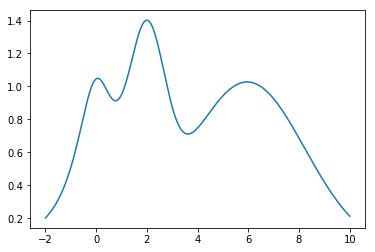

In [6]:
KAPPA = 5
x = np.linspace(-2, 10, 1000)

y = target(x)

plt.plot(x, y)

In [15]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.94125 |    4.9870 | 
    2 | 00m00s |    1.21736 |    2.4897 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.20166 |   -2.0000 | 
    4 | 00m00s |    0.21180 |   10.0000 | 
    5 | 00m00s |    0.91697 |    0.6888 | 
    6 | 00m00s |    0.71216 |    3.5615 | 
    7 | 00m00s |    0.85010 |    7.3564 | 
    8 | 00m00s |    1.02286 |    6.1665 | 
    9 | 00m00s |    1.31432 |    1.6704 | 
   10 | 00m01s |    0.53478 |    8.5523 | 
   11 | 00m01s |    1.40041 |    2.0422 | 
   12 | 00m01s |    0.78734 |   -0.5435 | 
   13 | 00m01s |    1.39288 |    1.8984 | 
   14 | 00m02s |    1.37488 |    2.1783 | 
   15 | 00m02s |    1.40153 |    1.9802 | 
   16 | 00m02s |    1.39774 |    2.0701 | 
   17 | 00m02s |    1.40184 |    1.9931 | 
   18 | 00m03s |    1.40034 |    1.9584 | 
   19 | 00m02s |   

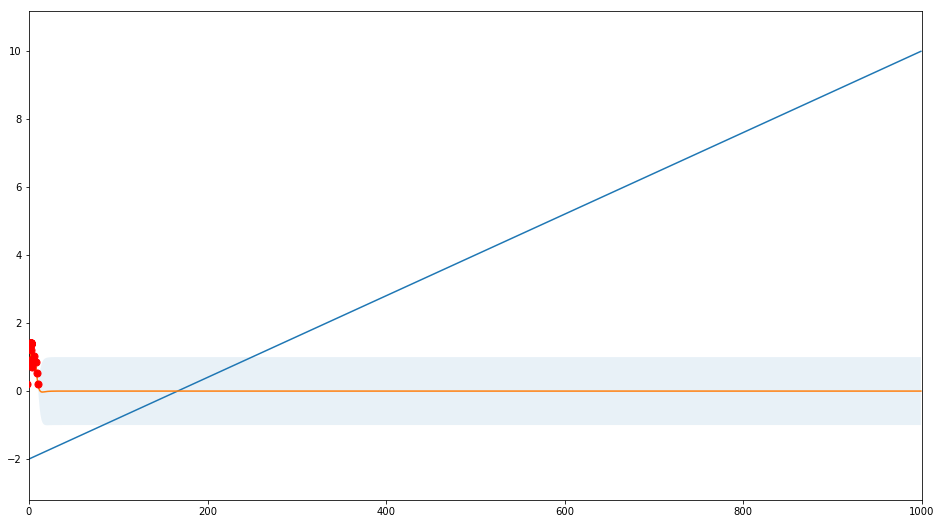

In [19]:
#A minimum number of 2 initial guesses is necessary to kick start the algorithms, these can either be random or user defined.

bo = BayesianOptimization(target, {'x': (-2, 10)})

#In this example we will use the Upper Confidence Bound (UCB) as our utility function. It has the free parameter κκ 
#which control the balance between exploration and exploitation; we will set κ=5κ=5 which, in this case, makes the 
#algorithm quite bold. Additionally we will use the cubic correlation in our Gaussian Process.

#gp_params = {'corr': 'cubic'}
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}
bo.maximize(init_points=2, n_iter=25, acq='ucb', kappa=KAPPA, **gp_params)
#bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=KAPPA)
plot_bo(x, bo)

In [9]:
bo.maximize(init_points=0, n_iter=1, kappa=KAPPA)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m01s |    0.20166 |   -2.0000 | 


In [10]:
bo.maximize(init_points=0, n_iter=1, kappa=KAPPA)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m01s |    0.77880 |    4.1700 | 


In [11]:
bo.maximize(init_points=0, n_iter=1, kappa=KAPPA)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    5 | 00m01s |    1.36386 |    1.7877 | 


In [12]:
bo.maximize(init_points=0, n_iter=1, kappa=KAPPA)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    6 | 00m01s |    0.96796 |    6.7420 | 


In [13]:
bo.maximize(init_points=0, n_iter=1, kappa=KAPPA)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    7 | 00m01s |    0.91322 |    0.7467 | 


In [14]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()